### Mohammad Abdulla
### mohammadabdulla20march@gmail.com


Personalized Wellness AI - Technical Proof-of-Concept

### Q1: Synthetic Data Design & Insights
Generating synthetic wellness data with realistic relationships...
Features: ['user_id', 'day', 'age', 'gender', 'daily_steps', 'sleep_duration_hours', 'mood_score', 'stress_level', 'dietary_quality_score', 'heart_rate_variability', 'water_intake_liters', 'workout_intensity']

Dataset shape: (990, 12)

First few rows:
   user_id  day  age gender   daily_steps  sleep_duration_hours  mood_score  \
0        1    1   56   Male  13460.398000              6.941397    9.591729   
1        1    2   56   Male   7800.764421              7.304484    8.212602   
2        1    3   56   Male  10373.357560              8.631397    9.306398   
3        1    4   56   Male   8838.003361              7.925500    8.402456   
4        1    5   56   Male   6429.942535              6.890883    7.886621   

   stress_level  dietary_quality_score  heart_rate_variability  \
0      1.384445               5.000000     

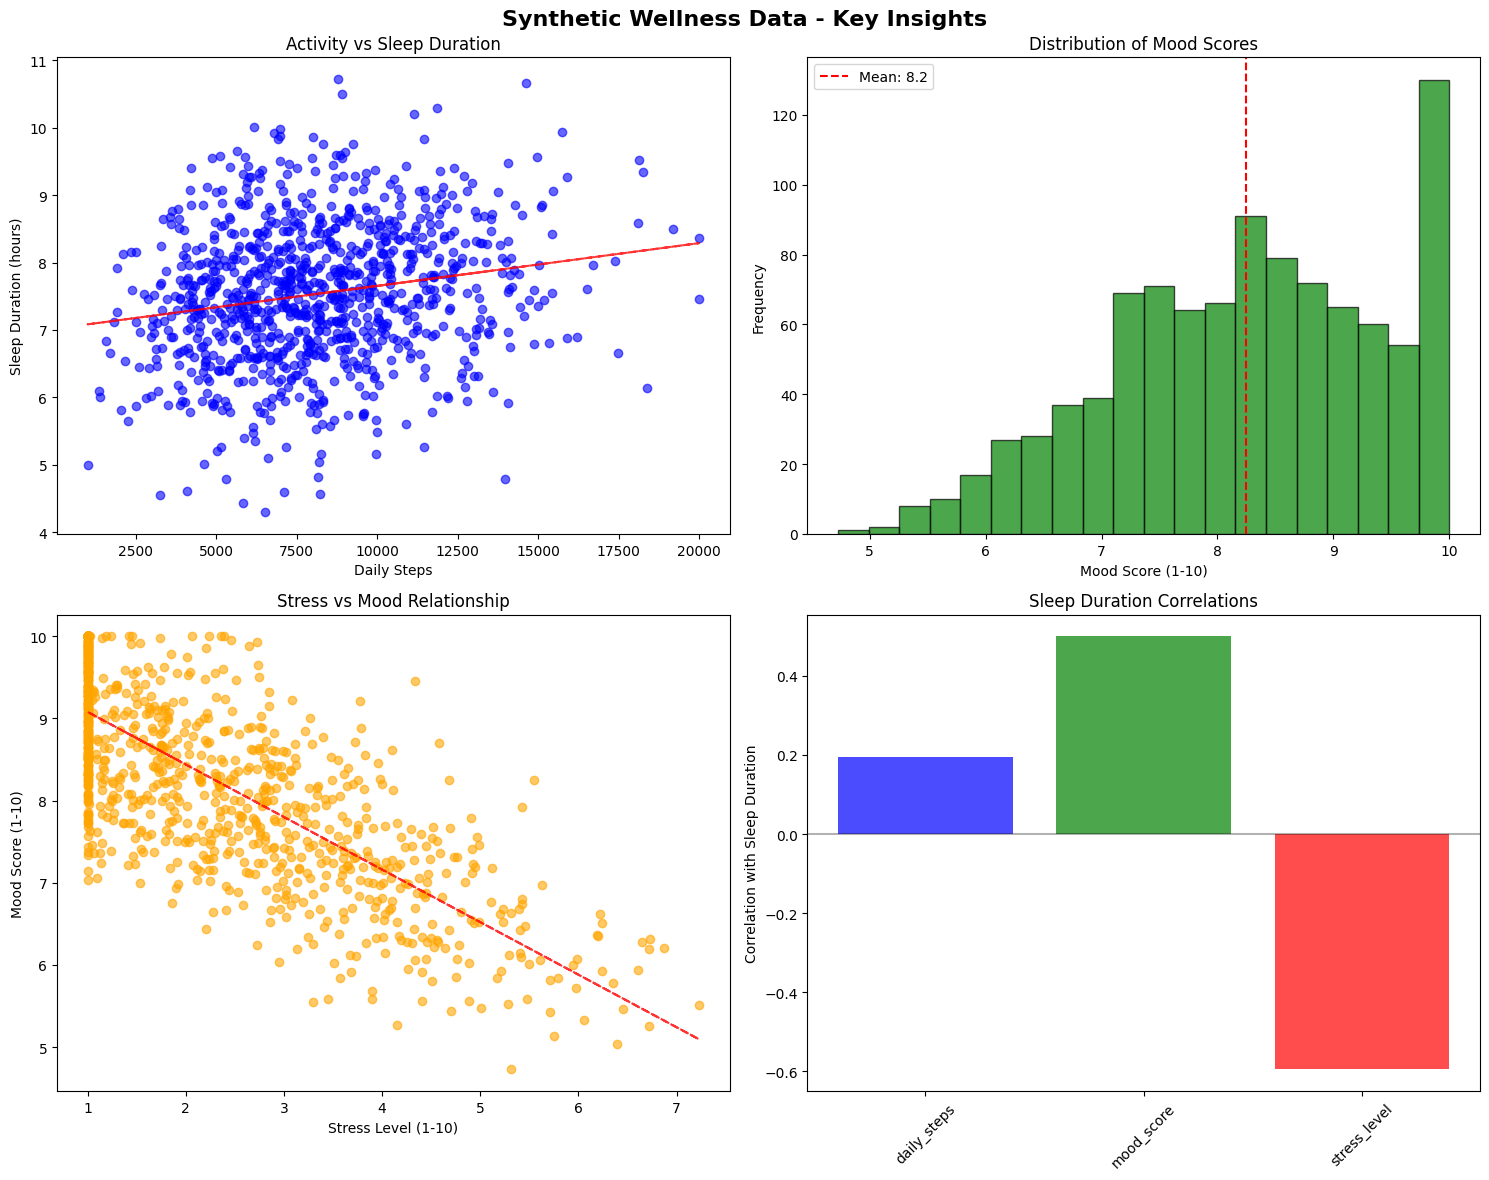

In [3]:
# Personalized Wellness AI Assignment
# ml_wellness_project_Mohammad_Abdulla.ipynb

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Personalized Wellness AI - Technical Proof-of-Concept")
print("=" * 60)

# Phase 1: Technical Proof-of-Concept (90 minutes)

# Q1: Synthetic Data Design & Insights
print("\n### Q1: Synthetic Data Design & Insights")
print("Generating synthetic wellness data with realistic relationships...")

n_samples = 1000
days = 30
n_users = n_samples // days

def generate_synthetic_wellness_data(n_samples=1000):
    data = {}
    data['user_id'] = np.repeat(range(1, n_users + 1), days)
    data['day'] = np.tile(range(1, days + 1), n_users)
    data['age'] = np.repeat(np.random.randint(18, 65, n_users), days)
    data['gender'] = np.repeat(np.random.choice(['Male', 'Female'], n_users), days)
    
    base_activity = np.repeat(np.random.normal(8000, 2000, n_users), days)
    weekend_boost = np.where(data['day'] % 7 < 2, 1.2, 1.0)
    daily_variation = np.random.normal(1, 0.3, n_samples)
    data['daily_steps'] = np.clip(base_activity * weekend_boost * daily_variation, 1000, 20000)
    
    age_factor = np.repeat(data['age'], 1) / 100
    activity_factor = data['daily_steps'] / 10000
    base_sleep = 7.5 - age_factor + activity_factor * 0.5
    data['sleep_duration_hours'] = np.clip(base_sleep + np.random.normal(0, 1, n_samples), 4, 12)
    
    sleep_effect = (data['sleep_duration_hours'] - 6) * 0.5
    activity_effect = np.clip((data['daily_steps'] - 5000) / 5000, -1, 1)
    base_mood = 7 + sleep_effect + activity_effect
    data['mood_score'] = np.clip(base_mood + np.random.normal(0, 1, n_samples), 1, 10)
    
    stress_base = 10 - data['mood_score'] + (8 - data['sleep_duration_hours']) * 0.5
    data['stress_level'] = np.clip(stress_base + np.random.normal(0, 1, n_samples), 1, 10)
    
    stress_effect = (10 - data['stress_level']) / 10
    activity_effect = np.clip(data['daily_steps'] / 15000, 0, 1)
    diet_base = 3 + stress_effect * 2 + activity_effect
    data['dietary_quality_score'] = np.clip(diet_base + np.random.normal(0, 0.5, n_samples), 1, 5)
    
    sleep_factor = data['sleep_duration_hours'] / 8
    stress_factor = (10 - data['stress_level']) / 10
    data['heart_rate_variability'] = np.clip(
        40 * sleep_factor * stress_factor + np.random.normal(0, 5, n_samples), 20, 60
    )
    
    activity_factor = data['daily_steps'] / 10000
    data['water_intake_liters'] = np.clip(
        2 + activity_factor + np.random.normal(0, 0.5, n_samples), 0.5, 5
    )
    
    workout_prob = np.clip(data['daily_steps'] / 15000, 0, 0.7)
    has_workout = np.random.binomial(1, workout_prob, n_samples)
    data['workout_intensity'] = has_workout * np.random.uniform(3, 9, n_samples)
    
    return pd.DataFrame(data)

def generate_synthetic_wellness_data(n_samples=1000):
    days = 30
    n_users = n_samples // days
    total_samples = n_users * days  # Ensure consistent shape
    
    data = {}

    data['user_id'] = np.repeat(range(1, n_users + 1), days)
    data['day'] = np.tile(range(1, days + 1), n_users)
    data['age'] = np.repeat(np.random.randint(18, 65, n_users), days)
    data['gender'] = np.repeat(np.random.choice(['Male', 'Female'], n_users), days)

    base_activity = np.repeat(np.random.normal(8000, 2000, n_users), days)
    weekend_boost = np.where(np.tile(range(1, days + 1), n_users) % 7 < 2, 1.2, 1.0)
    daily_variation = np.random.normal(1, 0.3, total_samples)
    data['daily_steps'] = np.clip(base_activity * weekend_boost * daily_variation, 1000, 20000)

    age_factor = np.array(data['age']) / 100
    activity_factor = data['daily_steps'] / 10000
    base_sleep = 7.5 - age_factor + activity_factor * 0.5
    data['sleep_duration_hours'] = np.clip(base_sleep + np.random.normal(0, 1, total_samples), 4, 12)

    sleep_effect = (data['sleep_duration_hours'] - 6) * 0.5
    activity_effect = np.clip((data['daily_steps'] - 5000) / 5000, -1, 1)
    base_mood = 7 + sleep_effect + activity_effect
    data['mood_score'] = np.clip(base_mood + np.random.normal(0, 1, total_samples), 1, 10)

    stress_base = 10 - data['mood_score'] + (8 - data['sleep_duration_hours']) * 0.5
    data['stress_level'] = np.clip(stress_base + np.random.normal(0, 1, total_samples), 1, 10)

    stress_effect = (10 - data['stress_level']) / 10
    activity_effect = np.clip(data['daily_steps'] / 15000, 0, 1)
    diet_base = 3 + stress_effect * 2 + activity_effect
    data['dietary_quality_score'] = np.clip(diet_base + np.random.normal(0, 0.5, total_samples), 1, 5)

    sleep_factor = data['sleep_duration_hours'] / 8
    stress_factor = (10 - data['stress_level']) / 10
    data['heart_rate_variability'] = np.clip(
        40 * sleep_factor * stress_factor + np.random.normal(0, 5, total_samples), 20, 60
    )

    activity_factor = data['daily_steps'] / 10000
    data['water_intake_liters'] = np.clip(
        2 + activity_factor + np.random.normal(0, 0.5, total_samples), 0.5, 5
    )

    workout_prob = np.clip(data['daily_steps'] / 15000, 0, 0.7)
    has_workout = np.random.binomial(1, workout_prob, total_samples)
    data['workout_intensity'] = has_workout * np.random.uniform(3, 9, total_samples)

    return pd.DataFrame(data)


df = generate_synthetic_wellness_data(n_samples)
print(f"Features: {list(df.columns)}")
print(f"\nDataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

print(f"\n### Data Summary:")
print(df.describe())

print(f"\n### Missing Values:")
print(df.isnull().sum())

print(f"\n### Key Assumptions Made:")
assumptions = [
    "1. Higher daily steps correlate with better sleep quality and mood",
    "2. Better sleep leads to improved mood and lower stress levels", 
    "3. Lower stress levels result in better dietary choices",
    "4. Weekend days show increased activity levels",
    "5. Age slightly affects sleep duration (older people sleep less)",
    "6. Heart rate variability reflects recovery and is influenced by sleep and stress",
    "7. Water intake increases with physical activity",
    "8. Workout intensity correlates with overall activity levels"
]
for assumption in assumptions:
    print(assumption)

print(f"\n### Creating Key Visualizations...")

plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Synthetic Wellness Data - Key Insights', fontsize=16, fontweight='bold')

axes[0, 0].scatter(df['daily_steps'], df['sleep_duration_hours'], alpha=0.6, color='blue')
axes[0, 0].set_xlabel('Daily Steps')
axes[0, 0].set_ylabel('Sleep Duration (hours)')
axes[0, 0].set_title('Activity vs Sleep Duration')
z = np.polyfit(df['daily_steps'], df['sleep_duration_hours'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['daily_steps'], p(df['daily_steps']), "r--", alpha=0.8)

axes[0, 1].hist(df['mood_score'], bins=20, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].set_xlabel('Mood Score (1-10)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Mood Scores')
axes[0, 1].axvline(df['mood_score'].mean(), color='red', linestyle='--', label=f'Mean: {df["mood_score"].mean():.1f}')
axes[0, 1].legend()

axes[1, 0].scatter(df['stress_level'], df['mood_score'], alpha=0.6, color='orange')
axes[1, 0].set_xlabel('Stress Level (1-10)')
axes[1, 0].set_ylabel('Mood Score (1-10)')
axes[1, 0].set_title('Stress vs Mood Relationship')
z = np.polyfit(df['stress_level'], df['mood_score'], 1)
p = np.poly1d(z)
axes[1, 0].plot(df['stress_level'], p(df['stress_level']), "r--", alpha=0.8)

sleep_quality = df['sleep_duration_hours']
factors = ['daily_steps', 'mood_score', 'stress_level']
correlations = [df[factor].corr(sleep_quality) for factor in factors]

axes[1, 1].bar(factors, correlations, color=['blue', 'green', 'red'], alpha=0.7)
axes[1, 1].set_ylabel('Correlation with Sleep Duration')
axes[1, 1].set_title('Sleep Duration Correlations')
axes[1, 1].set_xticks(range(len(factors)))
axes[1, 1].set_xticklabels(factors, rotation=45)
axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()
